# Imports
Importing pandas and data files

In [1]:
import os, numpy as np, pandas as pd
file = os.sep.join(['seeds_dataset.txt'])
data = pd.read_csv(file, sep="\t", header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","h"])

data=data.drop(columns=['h'])
data.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [2]:
# Number of rows
print("no. of rows = ",data.shape[0],"\n")

# Column names
print("the columns are",data.columns.tolist(),"\n")

# Data types
print(data.dtypes)

no. of rows =  210 

the columns are ['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry coefficient', ' Length of kernel groove'] 

Area                        float64
Perimeter                   float64
Compactness                 float64
Length of Kernel            float64
Width of Kernel             float64
Asymmetry coefficient       float64
 Length of kernel groove    float64
dtype: object


# EDA
Commence the EDA

In [3]:
data['Compactness'].describe()

count    207.000000
mean       0.871280
std        0.023306
min        0.808100
25%        0.857700
50%        0.873500
75%        0.887650
max        0.918300
Name: Compactness, dtype: float64

# Plotting
Do the plots


[Text(0,0.5,'Perimeter'), Text(0.5,0,'Area'), Text(0.5,1,'Area vs Perimeter')]

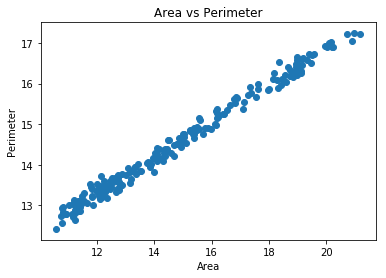

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data['Area'], data['Perimeter'])

# Label the axes
ax.set(xlabel='Area',
       ylabel='Perimeter',
       title='Area vs Perimeter')

We can say Area and Perimeter have a proportional relationship

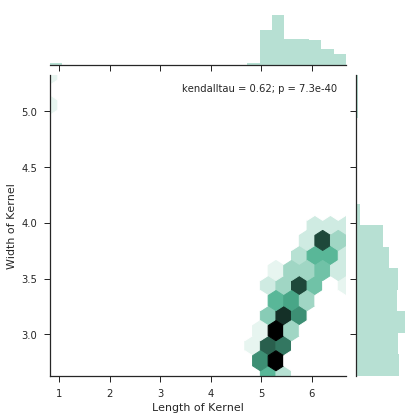

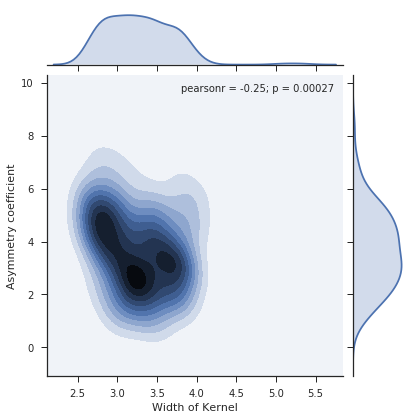

In [5]:
import seaborn as sns
from scipy.stats import kendalltau
sns.set(style="ticks")

sns.jointplot(data['Length of Kernel'], data['Width of Kernel'], kind="hex", stat_func=kendalltau, color="#4CB391")
sns.jointplot(x="Width of Kernel", y="Asymmetry coefficient", data=data, kind="kde");

https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient

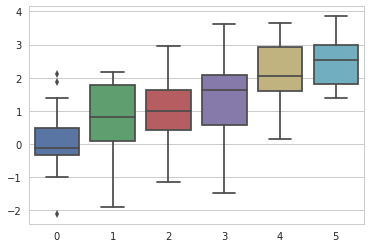

In [6]:
sns.set_style("whitegrid")
databp = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=databp);   ####EDA

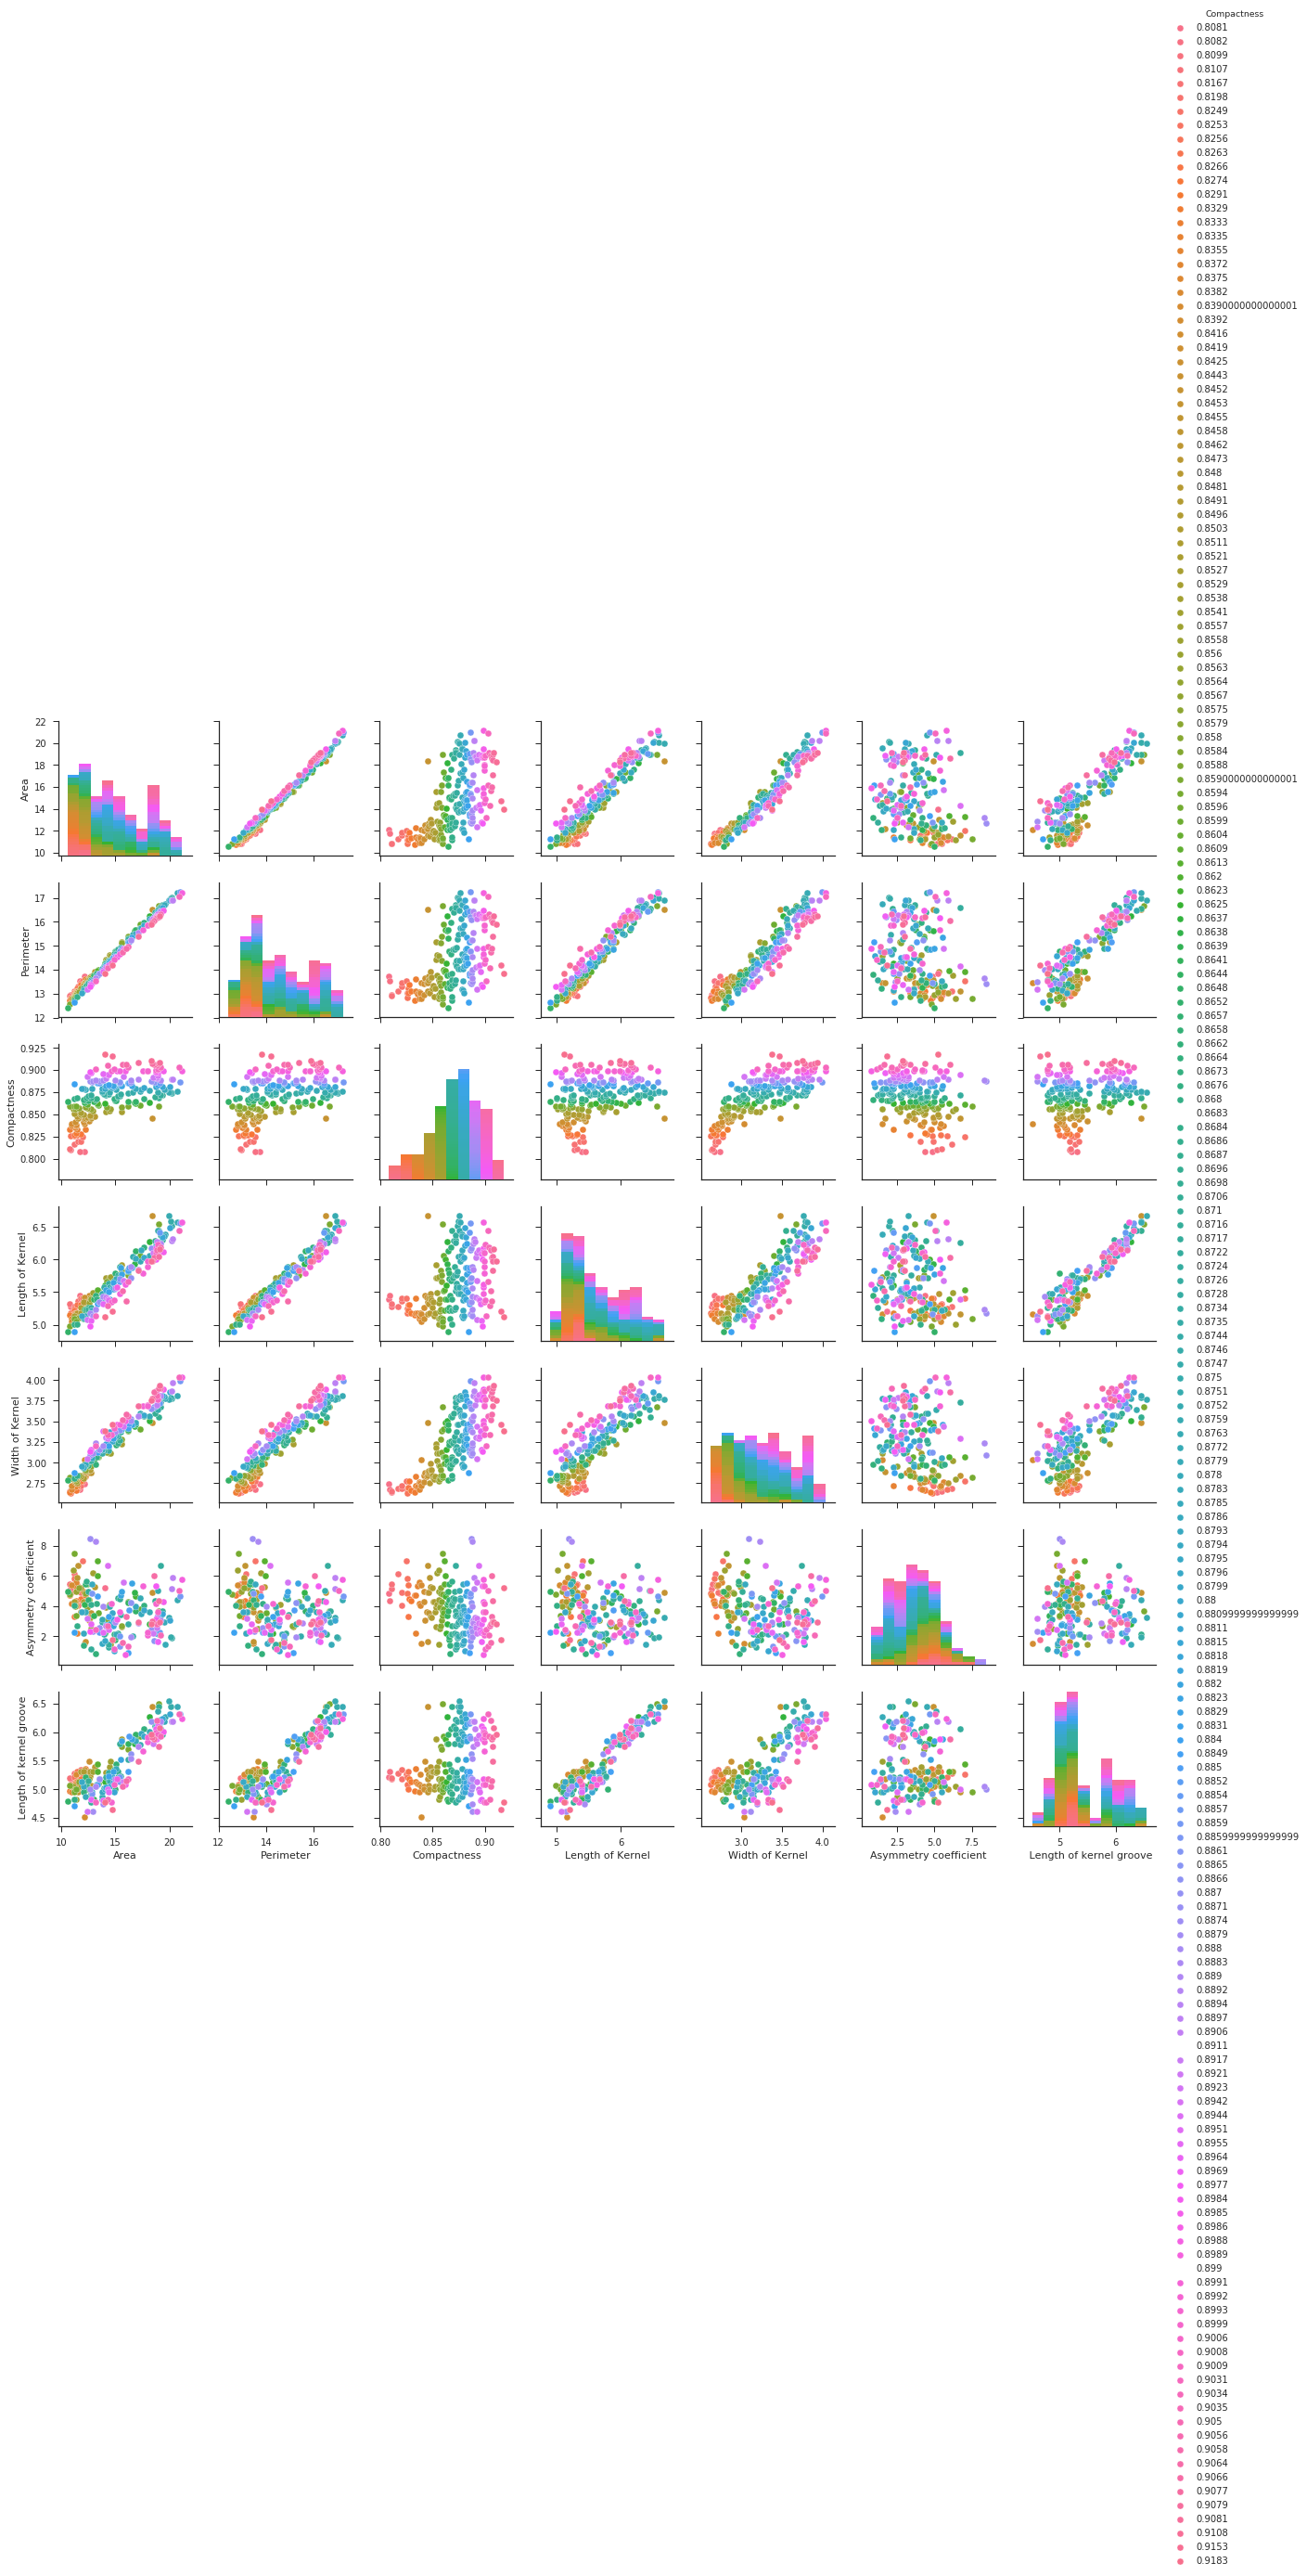

In [9]:
sns.set(style="ticks")
#scatter_data = data
#df = pd.DataFrame(data,index=data[:,0]),
sns.pairplot(data, hue="Compactness")

[[15.26   14.84    0.871  ...  3.312   2.221   5.22  ]
 [14.88   14.57    0.8811 ...  3.333   1.018   4.956 ]
 [14.29   14.09    0.905  ...  3.337   2.699   4.825 ]
 ...
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [11.84   13.21    0.8521 ...  2.836   3.598   5.044 ]
 [12.3    13.34    0.8684 ...  2.974   5.637   5.063 ]]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


TypeError: float() argument must be a string or a number, not 'KMeans'

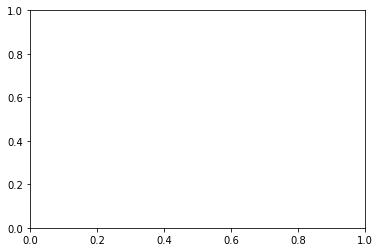

In [26]:
import sklearn
from sklearn.cluster import KMeans
import os
import pandas as pd
import matplotlib.pyplot as plt

file = os.sep.join(['seeds_dataset.txt'])
data = pd.read_csv(file, sep="\t", header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","h"])

data=data.drop(columns=['h'])
data.head()

#print(type(data))
dataVals = data.values

print(dataVals)

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

print(kmeans)

plt.plot(kmeans)
